In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# To get the string stats in describe
# titanic.describe(include = "O")

# Data frame attributes 
# .shape , .size , .index , .columns  all without brackets 

In [ ]:
# for sample we upload titanic dataset from Data manipulation Alex Hangman course Mod 1 
from google.colab import files
upload_file=files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df=pd.read_csv('titanic.csv')
# Method chaining , in this top values get sorted 
df.mean().sort_values().head(2)

parch       0.381594
survived    0.383838
dtype: float64

In [ ]:
# single brackets result in series , double result in dataframe
type(df['age']), type(df[['age']])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### Using iLoc
> iloc is used for index labelling 


In [ ]:
# single bracket - both rows and columns 
df.iloc[0:2,2:4]
# double bracket - can be used for row index 
df.iloc[[2,4,6]]
# select multiple rows and multiple columns double bracket
df.iloc[[2,4,6],[3,5]]

,age,parch
2,26.0,0
4,35.0,0
6,54.0,0


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


### Using Loc (labels)

In [ ]:
# single bracket - we can exploit the rows with index 
df.loc[0:2]
# single bracket both rows and columns when using :
df.loc[0:2,'sex':'fare']
df.loc[0:2,['sex','age']]
# double bracket when both rows and columns and individual column and row no selection
df.loc[[0,4,6],['age','fare']]




,age,fare
0,22.0,7.2500
4,35.0,8.0500
6,54.0,51.8625


In [ ]:
## Getting columns in list and then using loc function to access coln label
cols=df.columns[:3].to_list() + ['age','fare']
cols
df.loc[:,cols]

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


### Missing values Treatment using SKlearn imputer 

In [ ]:
df.isnull().sum()
df['age'].mean()

29.69911764705882

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
### Missing values Treatment using SKlearn imputer 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
# Fit the age
imputer = imputer.fit(df.iloc[:,3:4])
# Transform age
df.iloc[:,3:4]=imputer.transform(df.iloc[:,3:4])

In [ ]:
# Check the age variable now
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

# Detecting and removing outliers using pyOD library

In [ ]:
pip install pyod

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 2.1MB 10.8MB/s 
  Created wheel for pyod: filename=pyod-0.8.3-cp36-none-any.whl size=110349 sha256=7e36d7d8df57185c30ff4d17549d6682da76060016bd952860ca61baa8b9222c
  Stored in directory: /root/.cache/pip/wheels/29/46/95/86facd235cce1d58ae6747ab1aea2b3742564325a66a60863a
  Created wheel for combo: filename=combo-0.1.1-cp36-none-any.whl size=42113 sha256=23ab4ebe3633fe6930b8384582569663edc12d63796b2a6c9cd2d06f4bc09705
  Stored in directory: /root/.cache/pip/wheels/55/ec/e5/a2331372c676c467e70c6646e646edf6997d5c4905b8c0f5e6
  Created wheel for suod: filename=suod-0.0.4-cp36-none-any.whl size=2167158 sha256=4d037814dc60cf871fcdd4632a5dd701b58a14a98e87c767bc29ef045dc9e86f
  Stored in directory: /root/.cache/pip/wheels/57/55/e5/a4fca65bba231f6d0115059b589148774b41faea25b3f2aa27
Successfully built pyod combo suod


In [ ]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# reading the big mart sales training data

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import files
upload_file=files.upload()

Saving Bigmart_train.csv to Bigmart_train.csv


In [ ]:
df = pd.read_csv("Bigmart_train.csv")

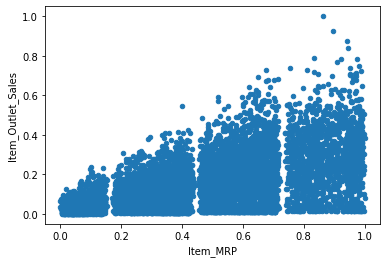

In [ ]:

# Scaling MRP and item Sales 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Item_MRP','Item_Outlet_Sales']] = scaler.fit_transform(df[['Item_MRP','Item_Outlet_Sales']])
df[['Item_MRP','Item_Outlet_Sales']].head()
df.plot.scatter('Item_MRP','Item_Outlet_Sales')

In [ ]:
# Store value in numpy array
X1 = df['Item_MRP'].values.reshape(-1,1)
X2 = df['Item_Outlet_Sales'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [ ]:
# Set outlier detection at 5%
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager

OUTLIERS :  447 INLIERS :  8076 Angle-based Outlier Detector (ABOD)


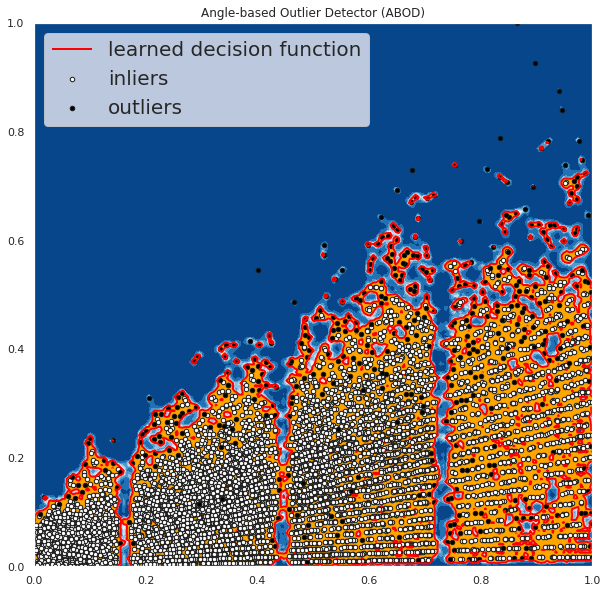

OUTLIERS :  427 INLIERS :  8096 Cluster-based Local Outlier Factor (CBLOF)


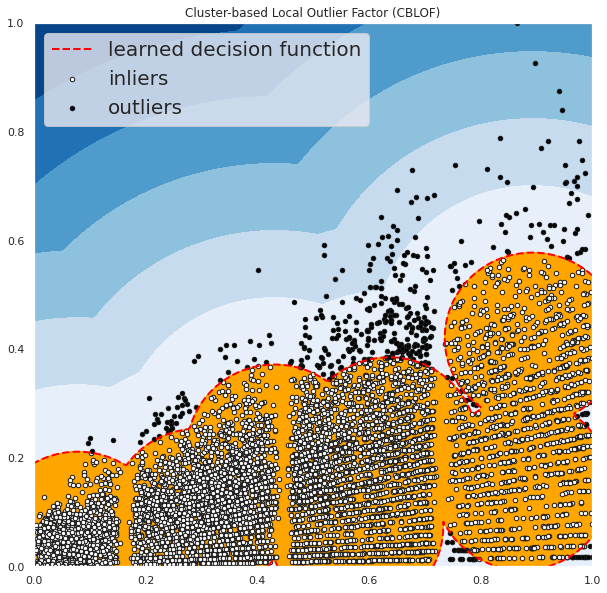

OUTLIERS :  369 INLIERS :  8154 Feature Bagging


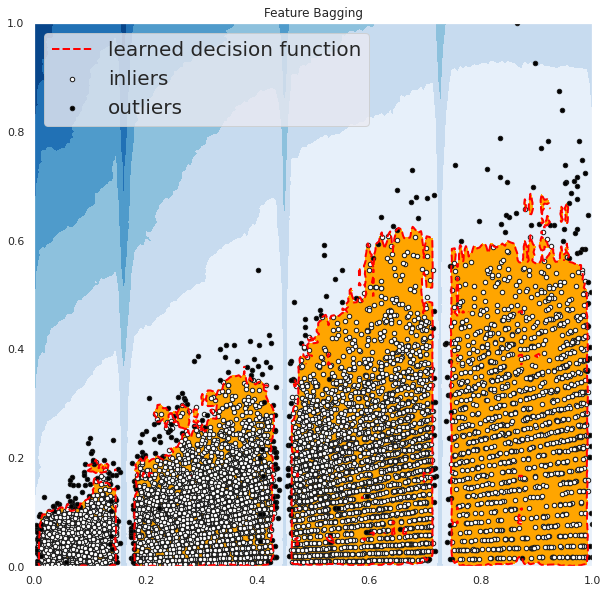

OUTLIERS :  501 INLIERS :  8022 Histogram-base Outlier Detection (HBOS)


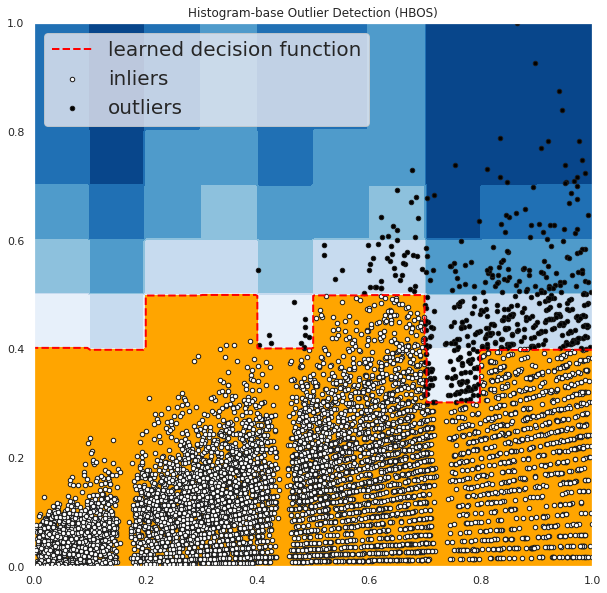

OUTLIERS :  427 INLIERS :  8096 Isolation Forest


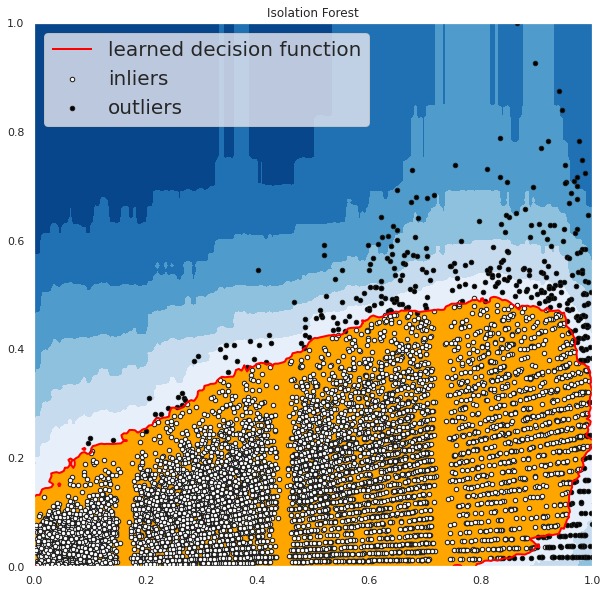

OUTLIERS :  311 INLIERS :  8212 K Nearest Neighbors (KNN)


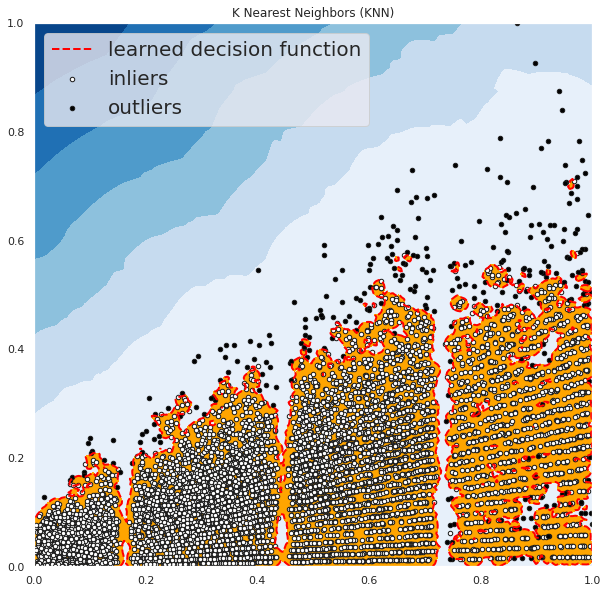

OUTLIERS :  176 INLIERS :  8347 Average KNN


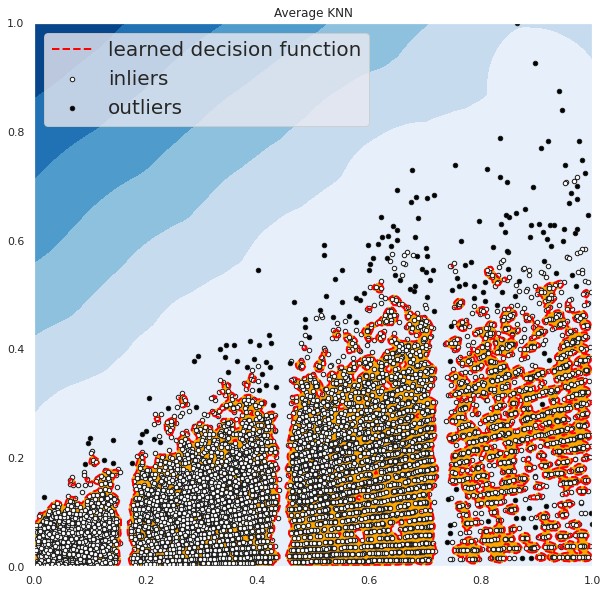

In [ ]:
# Fit each data to model and see how each model performs
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Item_MRP'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Item_Outlet_Sales'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Item_MRP'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Item_Outlet_Sales'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

In [ ]:
# Group by and use of aggregate function
#df.loc[df.Athelete=='Lewis, Carl'].groupby('Athelete').agg({'Edition':['min','max','count']})
#df.groupby(['Edition','NOC','Medal']).agg({'Edition':['min','max','count']})

# Balanced and Imbalanced Data 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(‘balanced’, y.unique(), y)
array([ 0.51722354, 15.01501502])

SyntaxError: ignored

In [ ]:
# we can pass these weights while training the model
class_weights = {
 0:0.51722354,
 1:15.01501502
}lr = LogisticRegression(C=3.0, fit_intercept=True, warm_start = True, class_weight=class_weights)

# We can pas the weights as balanced 
lr = LogisticRegression(C=3.0, fit_intercept=True, warm_start = True, class_weight=’balanced’)

SyntaxError: ignored

# Using Smote
# https://github.com/mwitiderrick/imbalanced-data/blob/master/imbalanced_data.ipynb

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(0.8)
X_resampled,y_resampled = smote.fit_resample(X.values,y.values)
pd.Series(y_resampled).value_counts()

# Fit the model after using oversampling 
model = LogisticRegression()
model.fit(X_resampled,y_resampled)
predictions = model.predict(X_test)

# Standardized Feature 

In [1]:
# Load libraries
from sklearn import preprocessing
import numpy as np

In [2]:
# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

In [3]:
# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(x)

# Show feature
standardized

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

# Min Max Scaling 

In [4]:
# Load libraries
from sklearn import preprocessing
import numpy as np

# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])

 # Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
x_scale = minmax_scale.fit_transform(x)

# Show feature
x_scale             

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

# PRe Processing IRIS Data 

In [11]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the iris data
iris = datasets.load_iris()

# Create a variable for the feature data
X = iris.data

# Create a variable for the target data
y = iris.target

In [13]:
# Random split the data into four new datasets, training features, training outcome, test features, 
# and test outcome. Set the size of the test data to be 30% of the full dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Load the standard scaler
sc = StandardScaler()

# Compute the mean and standard deviation based on the training data
sc.fit(X_train)

# Scale the training data to be of mean 0 and of unit variance
X_train_std = sc.transform(X_train)

# Scale the test data to be of mean 0 and of unit variance
X_test_std = sc.transform(X_test)

In [15]:
# Feature Test Data, non-standardized
print(X_test[0:5])
# Feature Test Data, standardized.
print(X_test_std[0:5])

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[[ 0.3100623  -0.50256349  0.484213   -0.05282593]
 [-0.17225683  1.89603497 -1.26695916 -1.27039917]
 [ 2.23933883 -0.98228318  1.76840592  1.43531914]
 [ 0.18948252 -0.26270364  0.36746819  0.35303182]
 [ 1.15412078 -0.50256349  0.54258541  0.2177459 ]]


# preprocessing categorical features 

In [16]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import pandas as pd

In [17]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
        'age': [42, 52, 36, 24, 73], 
        'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])
df

,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


In [18]:
# Create dummy variables for every unique category in df.city
pd.get_dummies(df["city"])

,Baltimore,Boston,Douglas,Miami,San Francisco
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,1,0,0,0


In [19]:
# Convert strings categorical names to integers
integerized_data = preprocessing.LabelEncoder().fit_transform(df["city"])

# View data
integerized_data

array([4, 0, 3, 2, 1])

In [20]:
# Convert integer categorical representations to OneHot encodings
preprocessing.OneHotEncoder().fit_transform(integerized_data.reshape(-1,1)).toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

# One hot encoding categorical feature 

In [22]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Create NumPy array
x = np.array([['Texas'], 
              ['California'], 
              ['Texas'], 
              ['Delaware'], 
              ['Texas']])

In [24]:
# Create LabelBinzarizer object
one_hot = OneHotEncoder()

# One-hot encode data
one_hot.fit_transform(x)

<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [25]:
# View classes
one_hot.categories_

[array(['California', 'Delaware', 'Texas'], dtype='<U10')]

# Method 2 for one hot encoding for nominal variables 

In [26]:
# Dummy feature
pd.get_dummies(x[:,0])

,California,Delaware,Texas
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


# One Hot encoding Multi label Binarizer 

In [27]:
# Load libraries
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Create NumPy array
y = [('Texas', 'Florida'), 
    ('California', 'Alabama'), 
    ('Texas', 'Florida'), 
    ('Delware', 'Florida'), 
    ('Texas', 'Alabama')]
print(y)

[('Texas', 'Florida'), ('California', 'Alabama'), ('Texas', 'Florida'), ('Delware', 'Florida'), ('Texas', 'Alabama')]


In [28]:
# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
one_hot.fit_transform(y)

array([[0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1]])

In [29]:
# View classes
one_hot.classes_

array(['Alabama', 'California', 'Delware', 'Florida', 'Texas'],
      dtype=object)

array([5, 4, 3, 2, 1])